# "Student" MDP

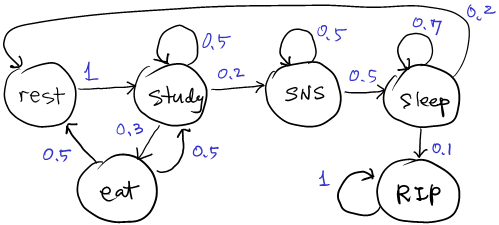

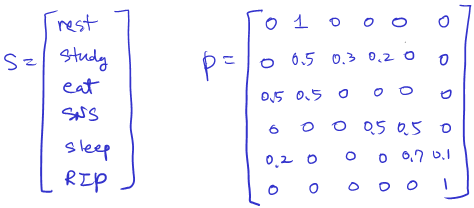

In [1]:
import numpy as np

P = np.array([[0,1,0,0,0,0],
              [0,0.5,0.3,0.2,0,0],
              [0.5,0.5,0,0,0,0],
              [0,0,0,0.5,0.5,0],
              [0.2,0,0,0,0.7,0.1],
              [0,0,0,0,0,1]])
print(P.sum(axis=1))

[1. 1. 1. 1. 1. 1.]


In [2]:
v0 = np.array([1,0,0,0,0,0])
v1 = np.matmul(v0,P)   # 2 dimension이면 dot과 동일
print('v1=', v1)
v2 = np.matmul(v1,P)
print('v2=', v2)
v3 = np.matmul(v2,P)
print('v3=', v3)  #초기 state 'rest' 에서 transition 3번

v1= [0. 1. 0. 0. 0. 0.]
v2= [0.  0.5 0.3 0.2 0.  0. ]
v3= [0.15 0.4  0.15 0.2  0.1  0.  ]


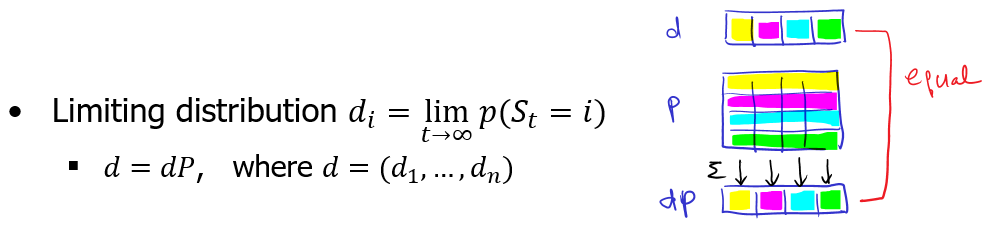

In [6]:
v = np.array([0,1,0,0,0,0])  # np.array([1,0,0,0,0,0])
for i in range(5000):
    v = np.matmul(v,P)
print ('v=', v)

v= [3.98865446e-62 1.25315229e-61 3.86565795e-62 5.30404480e-62
 9.73122669e-62 1.00000000e+00]


In [7]:
w,v = np.linalg.eig(P.T)   #.T : transpose / w: eigen value, v: eigen vector
print(w)
d = np.real_if_close(v[:,0])   #real_if_close: If input is complex with all imaginary parts close to zero, return real parts.
#print(d)
print("d = ", d/d.sum())  # sum to 1

[ 1.        +0.j         -0.18383129+0.35815871j -0.18383129-0.35815871j
  0.97252704+0.j          0.54756777+0.18234902j  0.54756777-0.18234902j]
[0. 0. 0. 0. 0. 1.]
d =  [0. 0. 0. 0. 0. 1.]


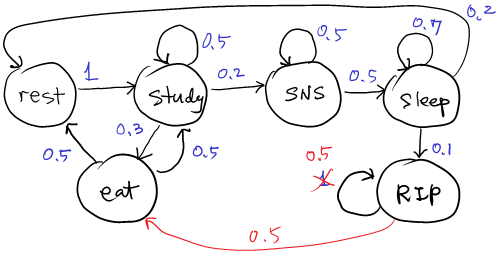

In [6]:
P = np.array([[0,1,0,0,0,0],
              [0,0.5,0.3,0.2,0,0],
              [0.5,0.5,0,0,0,0],
              [0,0,0,0.5,0.5,0],
              [0.2,0,0,0,0.7,0.1],
              [0.5,0,0,0,0,0.5]])

w,v = np.linalg.eig(P.T)
print(w)
d = np.real_if_close(v[:,2])
print("d=", d/d.sum())  # sum to 1

[-0.18616765+0.36182691j -0.18616765-0.36182691j  1.        +0.j
  0.5954077 +0.24703993j  0.5954077 -0.24703993j  0.38151989+0.j        ]
d= [0.12280702 0.35087719 0.10526316 0.14035088 0.23391813 0.04678363]


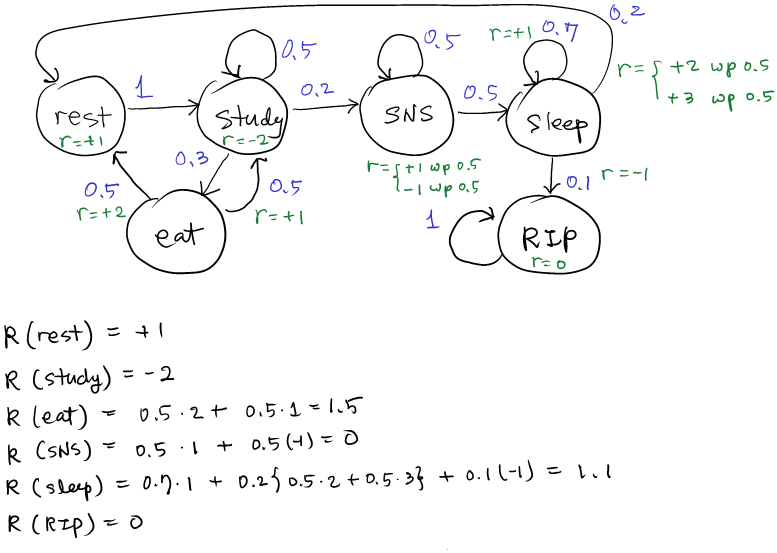

In [35]:
R = np.array([1,-2,1.5,0,1.1,0]).T  # 뒤의 MDP에서는 study의 reward가 양수
gamma = 0.99
print(R.shape)

(6,)


In [36]:
# fixed point iteration
V = np.zeros(6)
for i in range(100):  # iteration 작아도 각 원소 간 대소 관계는 크게 다르지 않음?
    V = R + gamma*np.matmul(P,V)
print("V=", V)    
#print(np.matmul(P,V).shape)

V= [-5.47550189 -6.54423599 -4.44643202  0.06338298  0.05949948  0.        ]


In [37]:
# direct method using inverse
MI = np.linalg.inv(np.eye(6)-gamma*P)  #np.eye : indentity matrix
V = np.matmul(MI,R)
print("V=", V)

V= [-5.56399367e+00 -6.63029664e+00 -4.53617371e+00 -5.33440835e-03
 -5.44217417e-03  0.00000000e+00]


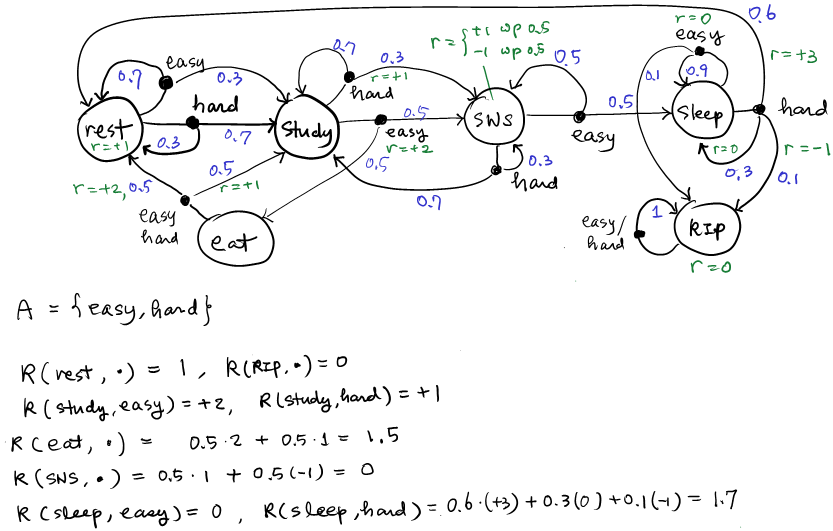

In [43]:
P_easy = np.array([[0.7,0.3,0,0,0,0],
                   [0,0,0.5,0.5,0,0],
                   [0.5,0.5,0,0,0,0],
                   [0,0,0.5,0.5,0,0],
                   [0,0,0,0,0.9,0.1],
                   [0,0,0,0,0,1]])
print(P_easy.sum(axis=1))
R_easy = np.array([1,2,1.5,0,0,0]).T

P_hard = np.array([[0.3,0.7,0,0,0,0],
                   [0,0.7,0,0.3,0,0],
                   [0.5,0.5,0,0,0,0],
                   [0,0.7,0,0.3,0,0],
                   [0.6,0,0,0,0.3,0.1],
                   [0,0,0,0,0,1]])
print(P_hard.sum(axis=1))
R_hard = np.array([1,1,1.5,0,1.7,0]).T

# .5 .5 mixed
P_mixed = 0.5*P_easy + 0.5*P_hard
#print(P_mixed)
print(P_mixed.sum(axis=1))
R_mixed = 0.5*R_easy + 0.5*R_hard

[1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1.]


### Direct method using matrix inversion
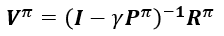

In [28]:
V_easy = np.matmul(np.linalg.inv(np.eye(6)-gamma*P_easy),R_easy)
print (V_easy)

[110.86343556 111.2292078  111.43585846 109.2292078    0.
   0.        ]


In [29]:
V_hard = np.matmul(np.linalg.inv(np.eye(6)-gamma*P_hard),R_hard)
print (V_hard)

[70.72247511 70.3        71.30612518 69.3        62.17517811  0.        ]


In [50]:
V_mixed = np.matmul(np.linalg.inv(np.eye(6)-gamma*P_mixed),R_mixed)
print (V_mixed)

[101.95697674 101.99651163 102.45697674 100.49651163  76.67788693
   0.        ]


### Fibonacci seq.
F(0) = F(1) = 1
F(n) = F(n-1) + F(n-1)

In [13]:
def fiboRec(n):
    if n <= 1: return n
    return fiboRec(n-1) + fiboRec(n-2)

print (fiboRec(20))

6765


In [14]:
def fiboForward (N):
    F = [0] * (N+1)
    F[0] = 0
    F[1] = 1
    for n in range(2,N+1):
        F[n] = F[n-1] + F[n-2]
    return F[N]

print (fiboForward(40))

102334155


### Iterative method
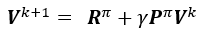

In [44]:
V_easy = np.zeros(6)
V_hard = np.zeros(6)
V_mixed = np.zeros(6)
for i in range(1000):
    V_easy = R_easy + gamma*np.matmul(P_easy, V_easy)
    V_hard = R_hard + gamma*np.matmul(P_hard, V_hard)
    V_mixed = R_mixed + gamma*np.matmul(P_mixed, V_mixed)
print (V_easy)
print (V_hard)
print (V_mixed)

[110.85865589 111.22442813 111.43107879 109.22442813   0.
   0.        ]
[70.71945312 70.29697801 71.30310319 69.29697801 62.17258784  0.        ]
[101.95258767 101.99212255 102.45258767 100.49212255  76.67459512
   0.        ]


## Optimal value function
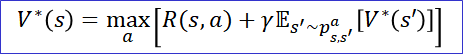

In [48]:
V_opt = np.zeros(6)
#V = np.zeros((6,2))
V = np.zeros((6,3))
for i in range(1000):
    V[:,0] = R_easy + gamma*np.matmul(P_easy, V_opt)
    V[:,1] = R_hard + gamma*np.matmul(P_hard, V_opt)
    V[:,2] = R_mixed + gamma*np.matmul(P_mixed, V_opt)
    V_opt = V.max(axis=1)
print (V_opt)

[121.01972202 121.32311218 121.45965076 119.59724691 104.67378402
   0.        ]


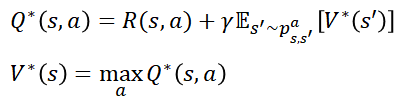

In [49]:
Q_opt = np.zeros((6,2))
#Q_opt = np.zeros((6,3))
V_opt = np.zeros(6)
for i in range(1000):
    Q_opt[:,0] = R_easy + gamma*np.matmul(P_easy, V_opt) # Q*(s, easy)
    Q_opt[:,1] = R_hard + gamma*np.matmul(P_hard, V_opt) # Q*(s, hard)
    #Q_opt[:,2] = R_mixed + gamma*np.matmul(P_mixed, V_opt) # Q*(s, mixed) # s->s' 확률은 다르지만 V*(s')은 동일
    # 근데 이 계산식은 deterministic policy -> Q (s, pi)라서 위처럼 같이 계산할 수 없는듯
    V_opt = Q_opt.max(axis=1)
print (Q_opt)  # Q*(s, easy) <= Q*(s, hard) => pi_easy <= pi_hard
print (V_opt)

[[120.89957951 121.01972202]
 [121.32311218 120.59724691]
 [121.45965076 121.45965076]
 [119.32311218 119.59724691]
 [ 93.26430132 104.67378402]
 [  0.           0.        ]]
[121.01972202 121.32311218 121.45965076 119.59724691 104.67378402
   0.        ]


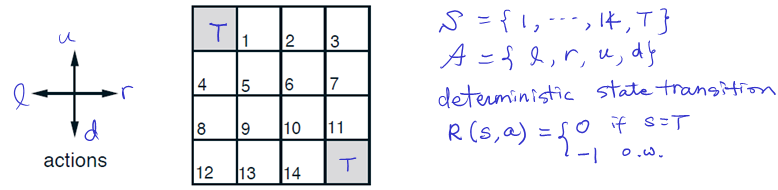

In [18]:
def move(i,j,h,w,a):
    ip, jp = i, j
    if a == 0 :  # left
        if j > 0: jp = j-1
    elif a == 1: # right
        if j < w-1: jp = j+1
    elif a == 2: # up
        if i > 0: ip = i-1
    elif a == 3: # down
        if i < h-1: ip = i+1
    return ip, jp
    
def gridworldGetP(w,h,a,terminal=[]):
    n = w*h
    P = np.zeros((n,n))
    for i in range(h):
        for j in range(w):
            k = i*w + j
            if k in terminal: continue # 움직일 수 X
            ip,jp = move(i,j,h,w,a) # ip, jp: next i, j, action = a 일때
            kp = ip*w + jp # kp : nest state 
            P[k,kp] = 1
    for k in terminal:
        P[k,k] = 1
    return P

# P = gridworldGetP(4,4,0,[0,15])
# print (P)
# print (P.sum(axis=1))

In [49]:
# make model for shortest path
terminal = [0,15]
P = []
for a in range(4):
    Pa = gridworldGetP(4,4,a,terminal) # Pa.ahspe = (16, 16)
    P.append(Pa) # P  = [P[0], P[1], P[2], P[3]]
    
R = np.full((16,4),-1) # np.full(shape, value): value로 이루어진 array
for s in terminal: 
    R[s,:] = 0
    
gamma = 1

# random policy
pi = np.full((16,4),0.25)

In [50]:
R_rand = (pi * R).sum(axis=1)  # what does rand mean? (16, 4)*(16, 4) prob*r -> sum(axis=1) => expectation for a (16, )
print (R_rand)

P_rand = np.zeros((16,16))
for s in range(16): # s -> s' prob
    for a in range(4):
        P_rand[s,:] += pi[s,a] * P[a][s,:]
print (P_rand)
print (P_rand.sum(axis=1)) # sum of all possibility of s'

# iterative evaluation of random policy (synch. backup, matrix version)
V_rand = np.zeros(16)
for i in range(20): # iteration
    V_rand = R_rand + gamma*np.matmul(P_rand, V_rand) # V_pi (16, )
    print (V_rand.reshape(4,4)) # grid로 출력

[ 0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  0.]
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.25 0.25 0.25 0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.25 0.25 0.25 0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.25 0.5  0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.25 0.   0.   0.   0.25 0.25 0.   0.   0.25 0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.25 0.   0.   0.25 0.   0.25 0.   0.   0.25 0.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.25 0.   0.   0.25 0.   0.25 0.   0.   0.25 0.   0.   0.
  0.   0.  ]
 [0.   0.   0.   0.25 0.   0.   0.25 0.25 0.   0.   0.   0.25 0.   0.
  0.   0.  ]
 [0.   0.   0.   0.   0.25 0.   0.   0.   0.25 0.25 0.   0.   0.25 0.
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.25 0.   0.   0.25 0.   0.25 0.   0.   0.25
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.25 0.   0.25 0.   0.
  0.25 0.  ]
 [0.   0.   0.   0.

In [51]:
# iterative policy evaluation (asynch. backup)
def policyEvaluation(P, R, gamma, pi, V, k): # for given pi
    for i in range(k): # iteration
        for s in range(16): #for all state
            sum = 0.0
            for a in range(4): #for all action
                sum += pi[s,a]*(R[s,a]+gamma*np.dot(P[a][s,:],V)) # sum of pi(s,a) * (R + gammap*P*V) = expected state value
            V[s] = sum
    return V

V = policyEvaluation(P, R, gamma, pi, np.zeros(16), 20)
print (V.reshape(4,4))

[[  0.         -11.42591538 -16.29940807 -17.92681232]
 [-11.42591538 -14.84125831 -16.57033147 -16.60954761]
 [-16.29940807 -16.57033147 -15.10598674 -11.83929409]
 [-17.92681232 -16.60954761 -11.83929409   0.        ]]


In [63]:
# greedy policy improvement
def getQ(V, P, R, gamma):
    Q = np.zeros((16,4))
    for s in range(16):
        for a in range(4):
            Q[s,a] = R[s,a] + gamma*np.dot(P[a][s,:],V)
    return Q

def greedy(Q):
    pi = np.zeros((16,4))
    for s in range(16):
        a = np.argmax(Q[s,:]) # tie braking? 
        pi[s,a] = 1
    return pi

def greedyPolicy(V, P, R, gamma):
    Q = getQ(V, P, R, gamma)
    # print(Q)
    pi = greedy(Q)
    # print (pi)
    return pi

In [65]:
# Policy iteration
k = 1
V = np.zeros(16)
for i in range(100):
    V = policyEvaluation(P, R, gamma, pi, V, k) #value에 대해서는 iteration k = 1 (정확한 value보다는 policy 평가할 수 있는 수준만 되면 됨)
    print (V.reshape(4,4))
    pi_old = pi
    pi = greedyPolicy(V, P, R, gamma)
    if np.equal(pi, pi_old).all():  # 더 이상 개선 x?
        break
dpi = np.argmax(pi,axis=1) # 어차피 하나의 action에 대해서만 1 => 그 action index return
print (dpi.reshape(4,4))


[[ 0. -1. -2. -3.]
 [-1. -2. -3. -1.]
 [-2. -3. -1. -1.]
 [-1. -1. -1.  0.]]
[[ 0. -1. -2. -2.]
 [-1. -2. -2. -2.]
 [-2. -2. -2. -1.]
 [-2. -3. -1.  0.]]
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]
[[0 0 0 0]
 [2 0 0 3]
 [2 0 1 3]
 [1 1 1 0]]


In [75]:
# value iteration (synchronous backup)
V = np.zeros(16)
Va = np.zeros(4)
for k in range(5):
    Vnew = np.zeros(16)
    for s in range(16):
        for a in range(4):
            Va[a] = R[s,a] + gamma*np.dot(P[a][s,:], V)
        Vnew[s] = np.max(Va)
    V = Vnew  # s에 대해 다 돌고나서 V update
    print (V.reshape(4,4))

[[ 0. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1.  0.]]
[[ 0. -1. -2. -2.]
 [-1. -2. -2. -2.]
 [-2. -2. -2. -1.]
 [-2. -2. -1.  0.]]
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]


In [73]:
# Asynchronous VI : In-place VI
V = np.zeros(16)
Va = np.zeros(4)
for k in range(100):
    print (V.reshape(4,4))
    changed = False
    for s in range(16):
        for a in range(4):
            Va[a] = R[s,a] + gamma*np.dot(P[a][s,:], V)
        old = V[s]
        V[s] = np.max(Va)  # 다음 s 계산할때 새로운 V 기준으로 계산
        if abs(V[s]-old) > 0.0001:
            changed = True
    if not changed:
        break

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[ 0. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1.  0.]]
[[ 0. -1. -2. -2.]
 [-1. -2. -2. -2.]
 [-2. -2. -2. -1.]
 [-2. -2. -1.  0.]]
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]


### Shortest path
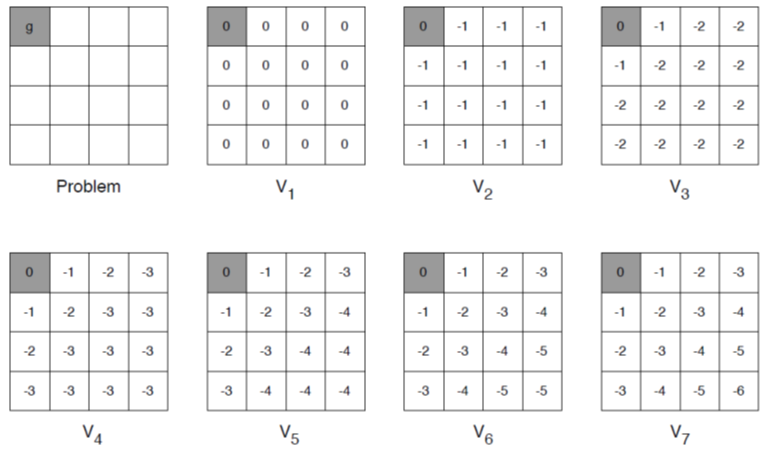

In [38]:
# make model for shortest path
terminal = [0]
P = []
for a in range(4):
    Pa = gridworldGetP(4,4,a,terminal)
    P.append(Pa)
    
R = np.full((16,4),-1)
for s in terminal: 
    R[s,:] = 0
    
gamma = 1

In [41]:
# Synchronous VI
V = np.zeros(16)
Va = np.zeros(4)
for k in range(6):
    Vnew = np.zeros(16)
    for s in range(16):
        for a in range(4):
            Va[a] = R[s,a] + gamma*np.dot(P[a][s,:], V)
        Vnew[s] = np.max(Va)
    V = Vnew
    print (V.reshape(4,4))

[[ 0. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]]
[[ 0. -1. -2. -2.]
 [-1. -2. -2. -2.]
 [-2. -2. -2. -2.]
 [-2. -2. -2. -2.]]
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -3.]
 [-2. -3. -3. -3.]
 [-3. -3. -3. -3.]]
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -4.]
 [-2. -3. -4. -4.]
 [-3. -4. -4. -4.]]
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -4.]
 [-2. -3. -4. -5.]
 [-3. -4. -5. -5.]]
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -4.]
 [-2. -3. -4. -5.]
 [-3. -4. -5. -6.]]


In [42]:
# Asynchronous VI : In-place VI
V = np.zeros(16)
for k in range(6):
    for s in range(16):
        for a in range(4):
            Va[a] = R[s] + gamma*np.dot(P[a][s,:], V)
        V[s] = np.max(Va)
    print (V.reshape(4,4))

[[ 0. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]]
[[ 0. -1. -2. -2.]
 [-1. -2. -2. -2.]
 [-2. -2. -2. -2.]
 [-2. -2. -2. -2.]]
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -3.]
 [-2. -3. -3. -3.]
 [-3. -3. -3. -3.]]
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -4.]
 [-2. -3. -4. -4.]
 [-3. -4. -4. -4.]]
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -4.]
 [-2. -3. -4. -5.]
 [-3. -4. -5. -5.]]
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -4.]
 [-2. -3. -4. -5.]
 [-3. -4. -5. -6.]]
